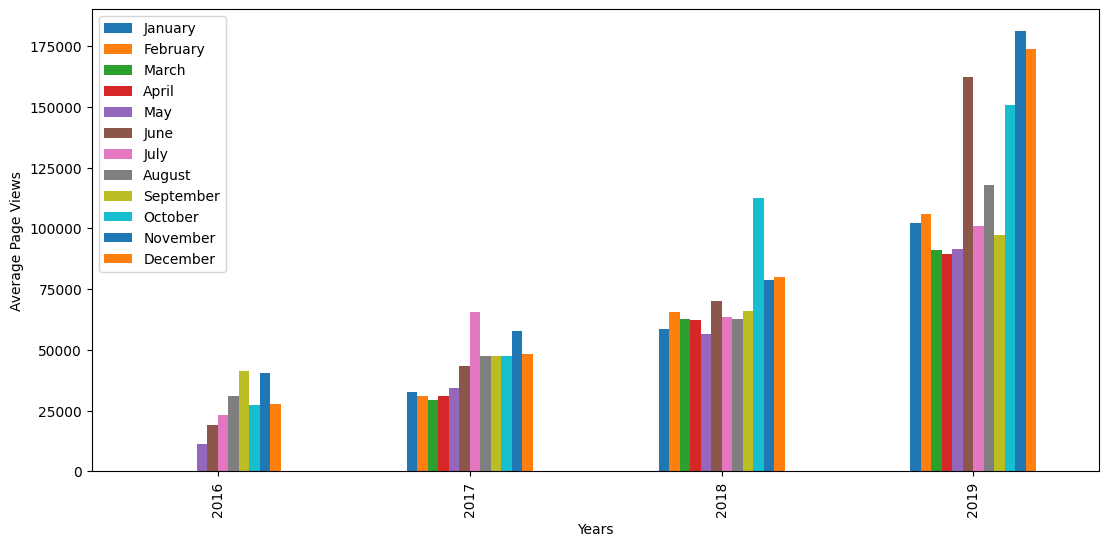

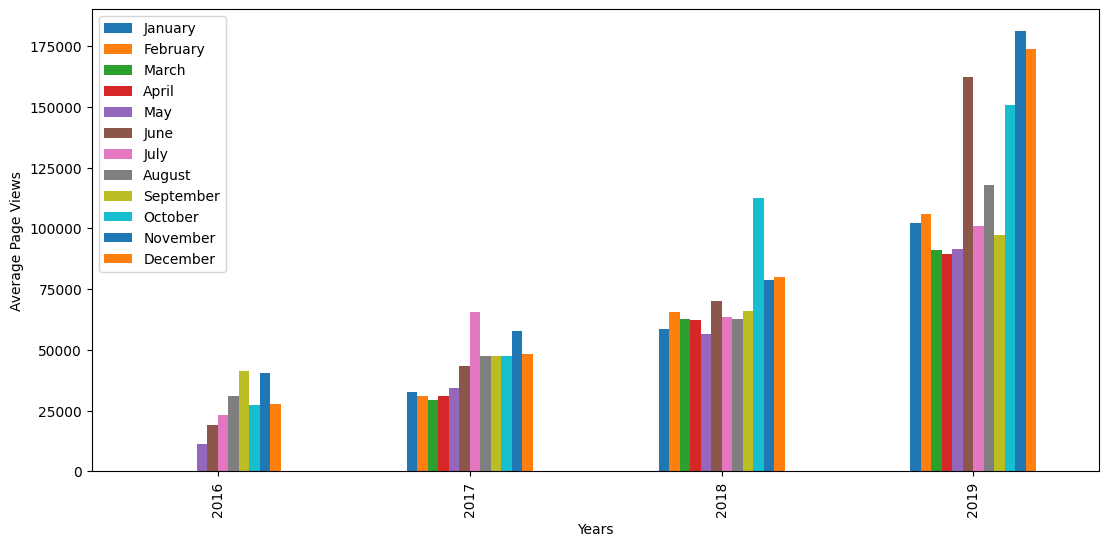

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates =["date"], index_col="date")

# Clean data
lower_25 = df[(df['value'] < df['value'].quantile(0.025))].index.tolist()
higher_975 = df[(df['value'] > df['value'].quantile(0.975))].index.tolist()
all_list = lower_25+higher_975
all_list = [*set(all_list)]
df = df.drop(all_list)


def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    #Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    df["month"] = df.index.month
    df["year"] = df.index.year
    df_bar = df.groupby(["year","month"])["value"].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend=True,figsize=(13,6), ylabel="Average Page Views",xlabel="Years").figure
    plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box["month_num"] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_num")

    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    axes[0] = sns.boxplot(x=df_box['year'],y=df_box["value"],ax = axes[0])
    axes[1] = sns.boxplot(x=df_box['month'],y=df_box["value"],ax = axes[1])

    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Page Views")




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_bar_plot()

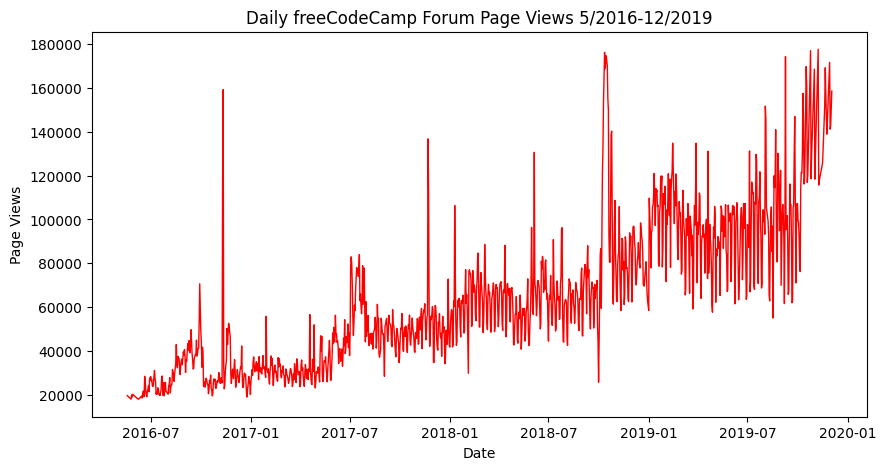

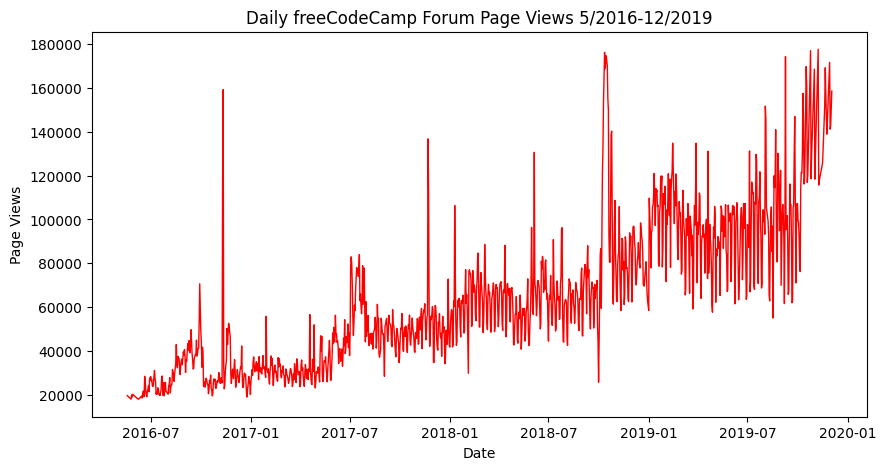

In [91]:
draw_line_plot()

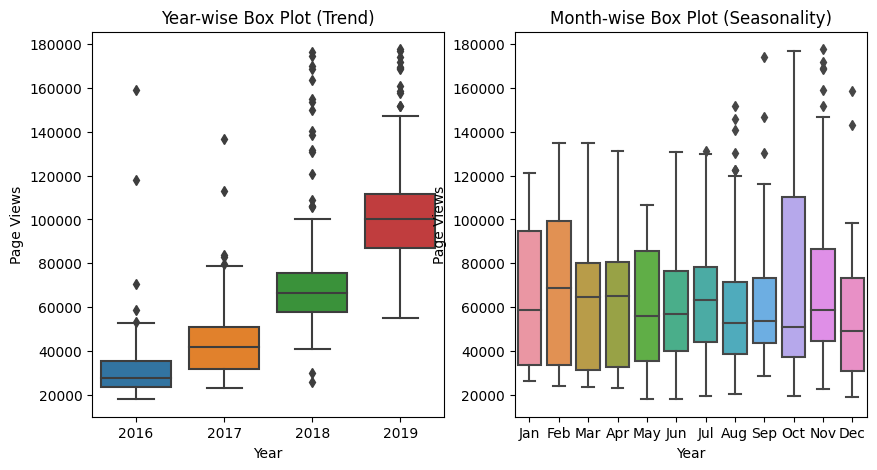

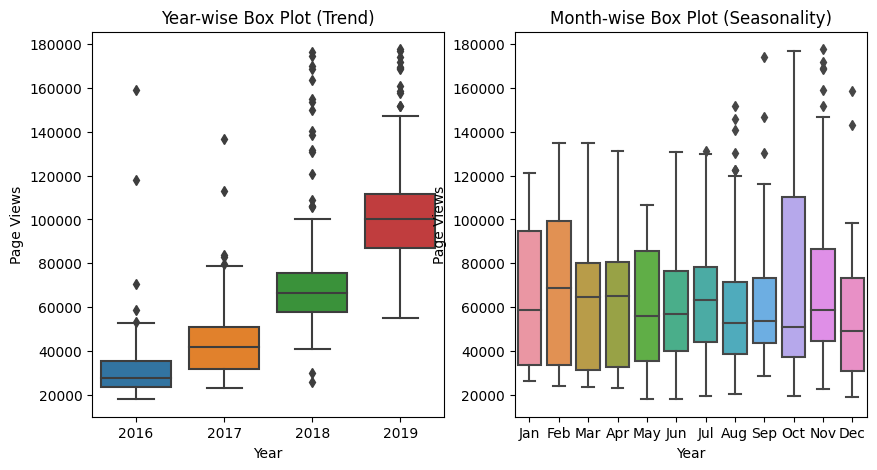

In [94]:
draw_box_plot()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df=pd.read_csv("epa-sea-level.csv")
    y = df["CSIRO Adjusted Sea Level"]
    x = df["Year"]
  

    # Create scatter plot
    fig,ax = plt.subplots()
    plt.scatter(x,y)

    # Create first line of best fit
    res = linregress(x,y)
    x_pred = pd.Series([i for i in range(1880,2050)])
    y_pred = res.slope*x_pred + res.intercept
    plt.plot(x_pred, y_pred, "r")

    # Create second line of best fit
    new_df = df.loc[df['Year'] >= 2000]
    new_x = new_df['Year']
    new_y = new_df["CSIRO Adjusted Sea Levels"]
    res_2 = linregress(new_x, new_y)
    x_pred2 = pd.Series([i for i in range(2000,2050)])
    plt.plot(x_pred2, y_pred2, 'green')

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

Text(0.5, 1.0, 'Rise in Sea Level')

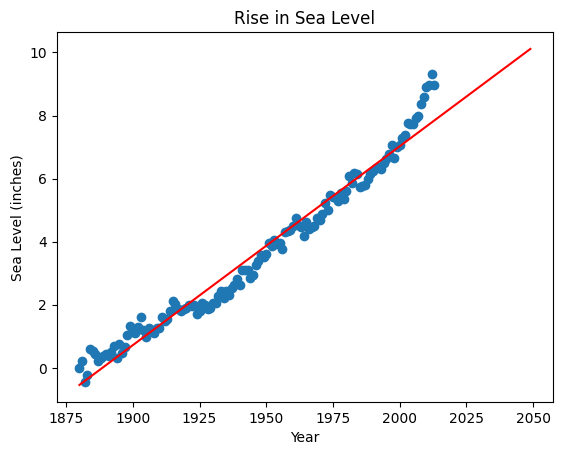

In [101]:
df=pd.read_csv("epa-sea-level.csv")
y = df["CSIRO Adjusted Sea Level"]
x = df["Year"]

fig,ax = plt.subplots()
plt.scatter(x,y)

res = linregress(x,y)
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred, y_pred, "r")

ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')






Text(0.5, 1.0, 'Rise in Sea Level')

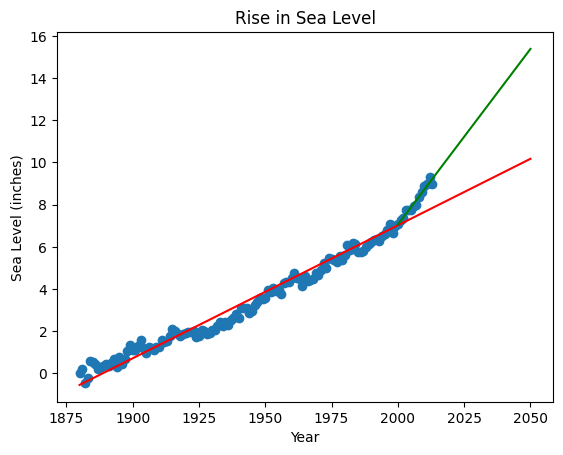

In [108]:
# Read data from file
df=pd.read_csv("epa-sea-level.csv")
y = df["CSIRO Adjusted Sea Level"]
x = df["Year"]


# Create scatter plot
fig,ax = plt.subplots()
plt.scatter(x,y)

# Create first line of best fit
res = linregress(x,y)
x_pred = pd.Series([i for i in range(1880,2051)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred, y_pred, "r")

# Create second line of best fit
new_df = df.loc[df['Year'] >= 2000]
new_x = new_df['Year']
new_y = new_df['CSIRO Adjusted Sea Level']
res_2 = linregress(new_x, new_y)
x_pred2 = pd.Series([i for i in range(2000,2051)])
y_pred2 = res_2.slope*x_pred2 + res_2.intercept
plt.plot(x_pred2, y_pred2, 'green')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')